In [1]:
import re
import nltk
import numpy as np
import pandas as pd

import keras
import tensorflow as tf

from wordcloud import WordCloud
from tensorflow.keras import layers, models, losses, Sequential, optimizers, metrics

In [ ]:
import tensorflow

print(tensorflow.__version__)

2.15.0


In [ ]:
import keras

print(keras.__version__)

2.15.0


In [ ]:
pip install seaborn -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
import seaborn as sns

print(sns.__version__)

0.13.2


In [ ]:
tweets_data = pd.read_csv("Tweets.csv")

tweets_data.sample(10)

,textID,text,selected_text,sentiment
23790,831e0978b3,Computer remains dead,dead,negative
2615,6ed1d3b93d,I`m up. getting ready for skill. can`t wait to...,I`m up. getting ready for skill. can`t wait to...,negative
13260,32ed1c1560,boo! i can`t sleep again saying hi to random ...,boo!,negative
24271,ba58a1b4b8,_Rocks Just spurted Fanta out of my mouth laug...,_Rocks Just spurted Fanta out of my mouth laug...,neutral
9960,30116fe6bd,"Josh Excuse me, but, at what time is it goin...","Josh Excuse me, but, at what time is it going...",neutral
14497,995b31503c,My Photoshop won`t let me save anything Due ...,won`t let me save anything,negative
9811,b76a01b1f8,Please visit http://vzerohost.com/info and sig...,Please visit http://vzerohost.com/info and sig...,neutral
22403,6d33d3e007,"Okay, no more driving. I know... I know... y...",. you are correct to say that.,positive
11396,b24b5eec02,cof Cof Cof!,cof Cof Cof!,neutral
3009,072064864c,I can`t go out when my heart is home sick eve...,I can`t go out when my heart is home sick eve...,neutral


In [ ]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [ ]:
tweets_data.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [ ]:
tweets_data = tweets_data.dropna()

tweets_data.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [ ]:
tweets_data.duplicated().sum()

In [ ]:
tweets_data = tweets_data.drop(columns = ["selected_text", "textID"])

tweets_data.sample(10)

,text,sentiment
24617,_Kinda_Guy your kids are growing up around sc...,neutral
21075,"Finally home, watching saturday night live, th...",neutral
8718,Awww mate. that`s such a shitter,negative
10987,Blah. Work at job one all day and job two all ...,negative
21704,Enjoying 'Gears of War' on my PC ! This game i...,positive
3831,Now that`s a very nice way to fall asleep.,positive
23228,would like to swap...i`m sitting with 3 grumpies,positive
21341,Thanks #sigjeans,positive
16450,PeeWee is napping on the couch. http://apps.f...,neutral
19461,thanks for wishing me luck a couple of weeks ...,neutral


In [ ]:
tweets_data["sentiment"].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

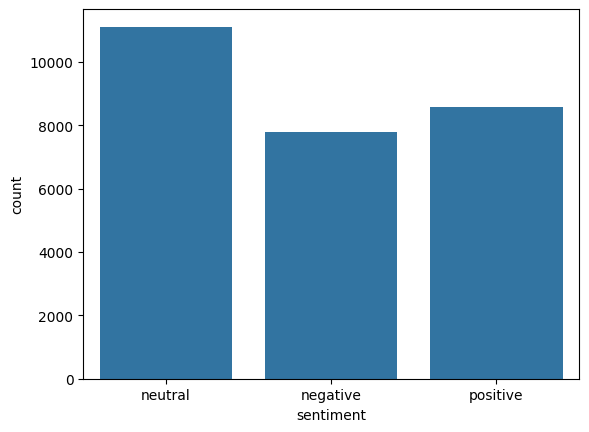

In [ ]:
import seaborn as sns

sns.countplot(data = tweets_data, x = "sentiment")

In [ ]:
tweets_data["word_count"] = tweets_data["text"].apply(lambda x: len(str(x).split(" ")))

tweets_data[["text", "word_count"]].sample(10)

,text,word_count
2516,what you laughing at over there got strawber...,10
10750,"thanks, I found it already",6
9721,"By Drove a #-mazda #RX8 today and boy, that c...",25
5479,you`re welcome Chica,4
109,"woof, I wish I was allowed to go",9
21380,"Nothing like 10P to kick-off the Bank Holiday,...",14
12915,"I`m struggling today...Nola woke up at 3:30, s...",13
23079,ur gonna be missed you know but i hope thing...,17
17389,"im just dreamin out loud, i cant have you for ...",15
11130,Sitting on the bed NOT wanting to go to work,10


In [ ]:
tweets_data.groupby("sentiment")["word_count"].mean()

sentiment
negative    14.244313
neutral     13.207610
positive    14.100210
Name: word_count, dtype: float64

In [ ]:
tweets_data.groupby("sentiment")["word_count"].median()

sentiment
negative    13.0
neutral     12.0
positive    13.0
Name: word_count, dtype: float64

<Axes: xlabel='word_count', ylabel='Count'>

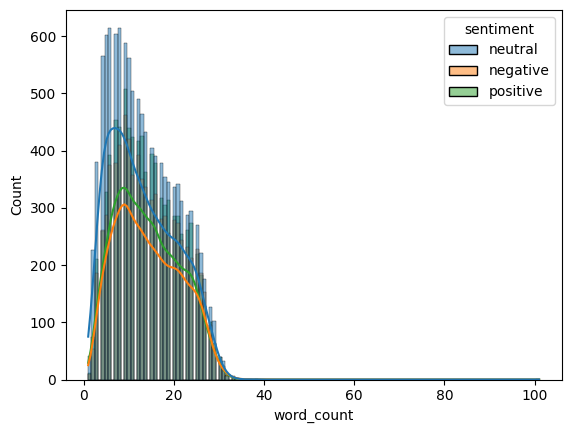

In [ ]:
sns.histplot(data = tweets_data, x = "word_count", hue = "sentiment", kde = True)

<Axes: ylabel='word_count'>

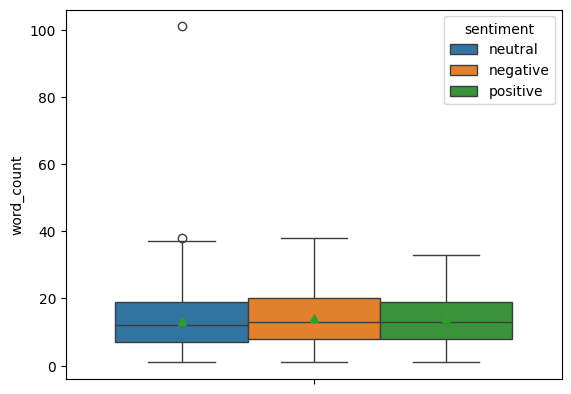

In [ ]:
sns.boxplot(data = tweets_data, y = "word_count", hue = "sentiment", showmeans = True)

In [ ]:
from nltk.corpus import stopwords

nltk.download("stopwords")

stop_words = stopwords.words("english")

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import string

def custom_standardization(input_data):

    # Convert to lowercase
    lowercase = tf.strings.lower(input_data)

    # Remove URLs
    stripped_urls = tf.strings.regex_replace(lowercase, r"https?://\S+|www\.\S+", "")

    # Remove email addresses
    stripped_symbol = tf.strings.regex_replace(stripped_urls, "\S*@\S*\s?", "")

    # Remove text in angular brackets (usually HTML tags)
    stripped_brackets = tf.strings.regex_replace(stripped_symbol, "<.*?>+", "")

    # Remove any square brackets and leave the text within square brackets
    stripped_brackets = tf.strings.regex_replace(stripped_brackets, "\[|\]", "")

    # Matches alphanumeric characters with digits and remove those
    stripped_digits = tf.strings.regex_replace(stripped_brackets, "\w*\d\w*", "")

    # Remove stopwords
    stripped_stopwords = tf.strings.regex_replace(stripped_digits, r"\b(?:{})\b".format("|".join(stop_words)), "")

    # Replace multiple whitespaces with a single whitespace
    stripped_whitespace_chars = tf.strings.regex_replace(stripped_stopwords, "\s+", " ")

    # Remove non-alphabet characters
    return tf.strings.regex_replace(stripped_whitespace_chars ,r"[^a-zA-Z\s]+" ,"")

In [ ]:
tweets_data["text"][5]

'http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth'

In [ ]:
custom_standardization(tweets_data["text"][5]).numpy()

b'  shameless plugging best rangers forum earth'

In [ ]:
tweets_data["text"][20]

' oh Marly, I`m so sorry!!  I hope you find her soon!! <3 <3'

In [ ]:
custom_standardization(tweets_data["text"][20]).numpy()

b' oh marly  sorry hope find soon  '

In [ ]:
tweets_data["text"][527]

'i am living in ignorance  :@'

In [ ]:
custom_standardization(tweets_data["text"][527]).numpy()

b' living ignorance '

In [ ]:
tweets_data["text"][11827]

'My Degree  [Tear] happy moment!  http://mypict.me/1ZpF'

In [ ]:
custom_standardization(tweets_data["text"][11827]).numpy()

b' degree tear happy moment '

In [ ]:
tweets_data["cleaned_text"] = tweets_data["text"].apply(custom_standardization)

tweets_data

,text,sentiment,word_count,cleaned_text
0,"I`d have responded, if I were going",neutral,8,"tf.Tensor(b' responded going', shape=(), dtyp..."
1,Sooo SAD I will miss you here in San Diego!!!,negative,11,"tf.Tensor(b' sooo sad miss san diego', shape=(..."
2,my boss is bullying me...,negative,5,"tf.Tensor(b' boss bullying ', shape=(), dtype=..."
3,what interview! leave me alone,negative,6,"tf.Tensor(b' interview leave alone', shape=(),..."
4,"Sons of ****, why couldn`t they put them on t...",negative,15,tf.Tensor(b' sons put releases already bough...
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,negative,18,tf.Tensor(b' wish could come see u denver husb...
27477,I`ve wondered about rake to. The client has ...,negative,26,tf.Tensor(b' wondered rake client made clear...
27478,Yay good for both of you. Enjoy the break - y...,positive,24,tf.Tensor(b' yay good enjoy break probably n...
27479,But it was worth it ****.,positive,8,"tf.Tensor(b' worth ', shape=(), dtype=string)"


In [ ]:
# Define a function to convert tensor to string
def tensor_to_string(tensor):
    return tensor.numpy().decode("utf-8")  # Assuming utf-8 encoding

# Apply the function to the DataFrame column
tweets_data["cleaned_text"] = tweets_data["cleaned_text"].apply(tensor_to_string)

tweets_data

,text,sentiment,word_count,cleaned_text
0,"I`d have responded, if I were going",neutral,8,responded going
1,Sooo SAD I will miss you here in San Diego!!!,negative,11,sooo sad miss san diego
2,my boss is bullying me...,negative,5,boss bullying
3,what interview! leave me alone,negative,6,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,15,sons put releases already bought
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,negative,18,wish could come see u denver husband lost job...
27477,I`ve wondered about rake to. The client has ...,negative,26,wondered rake client made clear net force...
27478,Yay good for both of you. Enjoy the break - y...,positive,24,yay good enjoy break probably need hectic w...
27479,But it was worth it ****.,positive,8,worth


In [ ]:
import matplotlib.pyplot as plt

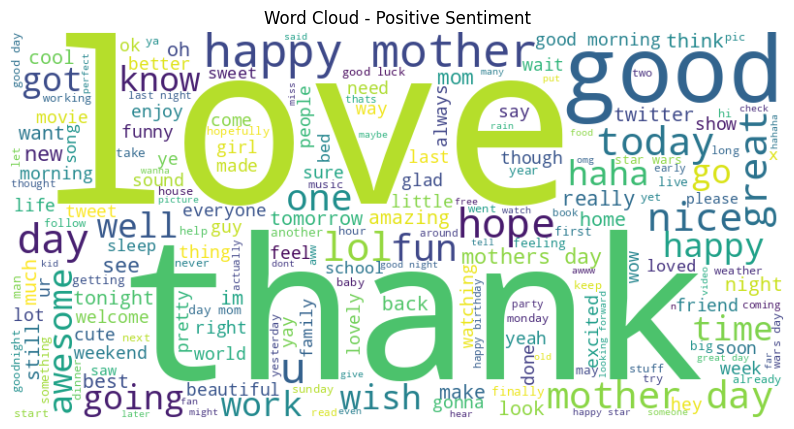

In [ ]:
# Extract the text from positive sentiment tweets
positive_tweets = tweets_data[tweets_data["sentiment"] == "positive"]["cleaned_text"]

# Concatenate all the positive sentiment tweets into a single string
positive_text = " ".join(positive_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(positive_text)

# Plot the WordCloud
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Sentiment")
plt.show()

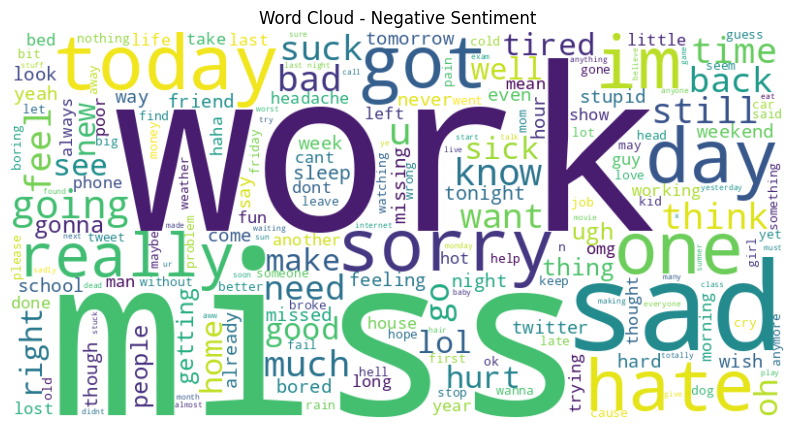

In [ ]:
# Extract the text from negative sentiment tweets
negative_tweets = tweets_data[tweets_data["sentiment"] == "negative"]["cleaned_text"]

# Concatenate all the negative sentiment tweets into a single string
negative_text = " ".join(negative_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(negative_text)

# Plot the WordCloud
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Word Cloud - Negative Sentiment")
plt.show()

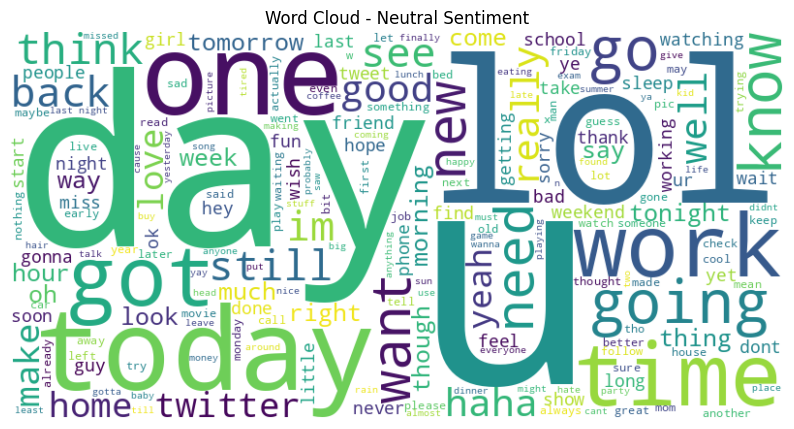

In [ ]:
# Extract the text from neutral sentiment tweets
neutral_tweets = tweets_data[tweets_data["sentiment"] == "neutral"]["cleaned_text"]

# Concatenate all the neutral sentiment tweets into a single string
neutral_tweets = " ".join(neutral_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(neutral_tweets)

# Plot the WordCloud
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Word Cloud - Neutral Sentiment")
plt.show()

In [ ]:
tweets_data["sentiment"] = tweets_data["sentiment"].replace({"negative": 0, "neutral": 1, "positive": 2})

tweets_data.sample(10)

,text,sentiment,word_count,cleaned_text
20969,WHAT! That`s horrible! To purposely write abo...,0,26,horrible purposely write bunny mean cruel ...
5034,"Aw, Kaelah I feel so bad for you. This sounds...",1,25,aw kaelah feel bad sounds serious please get...
12679,My head hurts so bad I could scream!,0,8,head hurts bad could scream
24444,Hav fun at heav y Metal happy hour you guys! I...,0,23,hav fun heav metal happy hour guys future acca...
20274,"ahhh ... i don`t care, i love this movie in al...",2,13,ahhh care love movie cheesyness
25244,Off to take a math quiz...on a friday....booo,1,8,take math quiz fridaybooo
11611,"ahhh twitter, I havent seen you all day",1,8,ahhh twitter havent seen day
8794,they tryna get me 2 sing on mic n i said NO NO...,1,14,tryna get sing mic n said noooooooo
22283,you are adorable,2,4,adorable
19486,HEY YOU` ALL SUCK;its anybody on there :s im s...,0,14,hey suck anybody im bored common answear


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(tweets_data, test_size = 0.2, stratify = tweets_data["sentiment"], random_state = 123)
X_train, X_val = train_test_split(X_train, test_size = 0.1, stratify = X_train["sentiment"], random_state = 123)

X_train.shape, X_val.shape, X_test.shape

((19785, 4), (2199, 4), (5496, 4))

In [ ]:
X_train["sentiment"].value_counts()

sentiment
1    8005
2    6178
0    5602
Name: count, dtype: int64

In [ ]:
X_val["sentiment"].value_counts()

sentiment
1    889
2    687
0    623
Name: count, dtype: int64

In [ ]:
X_test["sentiment"].value_counts()

sentiment
1    2223
2    1717
0    1556
Name: count, dtype: int64

In [ ]:
raw_train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train["text"].values, X_train["sentiment"].values)).shuffle(1024).batch(batch_size = 128)

raw_val_ds = tf.data.Dataset.from_tensor_slices(
    (X_val["text"].values, X_val["sentiment"].values)).batch(batch_size = 128)

raw_test_ds = tf.data.Dataset.from_tensor_slices(
    (X_test["text"].values, X_test["sentiment"].values)).batch(batch_size = 128)

len(raw_train_ds), len(raw_val_ds), len(raw_test_ds)

(155, 18, 43)

In [ ]:
vocab_size = 30

count_vectorizer = layers.TextVectorization(
    standardize = "lower_and_strip_punctuation",
    max_tokens = vocab_size,
    output_mode = "count",
)

In [ ]:
# list of text documents
text = ["Malcolm is an amazing painter. Malcolm also loves watching cricket",
        "Dean cooks well",
        "Malcolm is a decent footballer too",
        "Chris is a teacher, he is quite experienced in teaching"]

In [ ]:
count_vectorizer.adapt(text)

In [ ]:
count_vectorizer.get_vocabulary()

['[UNK]',
 'is',
 'malcolm',
 'a',
 'well',
 'watching',
 'too',
 'teaching',
 'teacher',
 'quite',
 'painter',
 'loves',
 'in',
 'he',
 'footballer',
 'experienced',
 'decent',
 'dean',
 'cricket',
 'cooks',
 'chris',
 'an',
 'amazing',
 'also']

In [ ]:
count_vectorizer(text)

<tf.Tensor: shape=(4, 24), dtype=float32, numpy=
array([[0., 1., 2., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)>

In [ ]:
vocab_size = 10000

count_vectorizer = layers.TextVectorization(
    standardize = custom_standardization,
    max_tokens = vocab_size,
    output_mode = "count",
    ngrams = (1, 2)
)

In [ ]:
# Make a text-only dataset (without labels), then call adapt

train_text = raw_train_ds.map(lambda x, y: x)

count_vectorizer.adapt(train_text)

In [ ]:
def vectorize_text(text, label):
    # Shape () => (1, )
    text = tf.expand_dims(text, -1)

    return count_vectorizer(text), label

In [ ]:
import sys
np.set_printoptions(threshold = sys.maxsize)

class_names = ["negative", "neutral", "positive"]
text_batch, label_batch = next(iter(raw_train_ds))
first_tweet, first_label = text_batch[0], label_batch[0]

print("Tweet: ", first_tweet)
print("Sentiment: ", class_names[first_label])
print("Vectorized review: ", vectorize_text(first_tweet, first_label))

Tweet:  tf.Tensor(b'wishing i could go to CaBo tonight', shape=(), dtype=string)
Sentiment:  positive
Vectorized review:  (<tf.Tensor: shape=(1, 10000), dtype=float32, numpy=
array([[3., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0

In [ ]:
count_vectorizer.get_vocabulary()

['[UNK]',
 'day',
 'good',
 'get',
 'like',
 'go',
 'today',
 'love',
 'going',
 'work',
 'got',
 'one',
 'time',
 'lol',
 'know',
 'happy',
 'u',
 'really',
 'back',
 'im',
 'see',
 'night',
 'new',
 'home',
 'think',
 'want',
 'well',
 'oh',
 'much',
 'still',
 'thanks',
 'miss',
 'great',
 'last',
 'need',
 'morning',
 'haha',
 'hope',
 'would',
 'feel',
 'fun',
 'tomorrow',
 'sorry',
 'twitter',
 'wish',
 'bad',
 'make',
 'tonight',
 'sad',
 'right',
 'week',
 'yeah',
 'nice',
 'way',
 'mother',
 'gonna',
 'though',
 'better',
 'sleep',
 'could',
 'weekend',
 'come',
 'next',
 'people',
 'bed',
 'getting',
 'mothers',
 'wait',
 'watching',
 'mother day',
 'hate',
 'days',
 'say',
 'awesome',
 'thing',
 'school',
 'dont',
 'even',
 'mom',
 'soon',
 'yes',
 'long',
 'little',
 'show',
 'best',
 'working',
 'sure',
 'never',
 'ok',
 'thank',
 'done',
 'mothers day',
 'tired',
 'hey',
 'cool',
 'feeling',
 'take',
 'cant',
 'happy mother',
 'everyone',
 'look',
 'first',
 'please',
 'l

In [ ]:
vocab_size =  len(count_vectorizer.get_vocabulary())

vocab_size

10000

In [ ]:
print("40   ---> ", count_vectorizer.get_vocabulary()[40])
print("80   ---> ", count_vectorizer.get_vocabulary()[80])
print("160  ---> ", count_vectorizer.get_vocabulary()[160])

40   --->  fun
80   --->  yes
160  --->  someone


In [ ]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
dnn_model = Sequential([
    layers.Dense(64, activation = "tanh"),
    layers.Dropout(0.1),
    layers.Dense(32, activation = "tanh"),
    layers.Dropout(0.1),
    layers.Dense(3)
])

In [ ]:
dnn_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = optimizers.Adam(learning_rate = 0.0001),
    metrics = ["accuracy"]
)

input_shape = (None, 10000)

dnn_model.build(input_shape)

dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 642243 (2.45 MB)
Trainable params: 642243 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = dnn_model.fit(
    train_ds,
    epochs = 10,
    validation_data = val_ds)

Epoch 1/10
155/155 [==============================] - 8s 13ms/step - loss: 1.0625 - accuracy: 0.4622 - val_loss: 1.0197 - val_accuracy: 0.5225
Epoch 2/10
155/155 [==============================] - 1s 8ms/step - loss: 0.9692 - accuracy: 0.5885 - val_loss: 0.9351 - val_accuracy: 0.6094
Epoch 3/10
155/155 [==============================] - 2s 10ms/step - loss: 0.8624 - accuracy: 0.6715 - val_loss: 0.8580 - val_accuracy: 0.6521
Epoch 4/10
155/155 [==============================] - 2s 11ms/step - loss: 0.7648 - accuracy: 0.7152 - val_loss: 0.8051 - val_accuracy: 0.6749
Epoch 5/10
155/155 [==============================] - 1s 7ms/step - loss: 0.6892 - accuracy: 0.7442 - val_loss: 0.7741 - val_accuracy: 0.6867
Epoch 6/10
155/155 [==============================] - 1s 8ms/step - loss: 0.6275 - accuracy: 0.7691 - val_loss: 0.7594 - val_accuracy: 0.6940
Epoch 7/10
155/155 [==============================] - 1s 9ms/step - loss: 0.5786 - accuracy: 0.7878 - val_loss: 0.7557 - val_accuracy: 0.6944
Epo

In [ ]:
loss, accuracy = dnn_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 [==============================] - 1s 20ms/step - loss: 0.8001 - accuracy: 0.6770
Loss:  0.8001062870025635
Accuracy:  0.6770378351211548


In [ ]:
history_dict = history.history

history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_dict

{'loss': [1.06248939037323,
  0.9691541194915771,
  0.8624244928359985,
  0.7647702693939209,
  0.6891939043998718,
  0.6274526715278625,
  0.5785934925079346,
  0.5374666452407837,
  0.5009704828262329,
  0.4688389301300049],
 'accuracy': [0.46216830611228943,
  0.5885266661643982,
  0.6715188026428223,
  0.7152388095855713,
  0.7442001700401306,
  0.7690674662590027,
  0.7878190279006958,
  0.8060146570205688,
  0.8218347430229187,
  0.8334091305732727],
 'val_loss': [1.0197193622589111,
  0.9350726008415222,
  0.8580236434936523,
  0.8051339387893677,
  0.7741298675537109,
  0.7593526244163513,
  0.7557440400123596,
  0.7602254748344421,
  0.769448459148407,
  0.7835479974746704],
 'val_accuracy': [0.5225102305412292,
  0.6093679070472717,
  0.6521145701408386,
  0.674852192401886,
  0.6866757869720459,
  0.6939517855644226,
  0.6944065690040588,
  0.695770800113678,
  0.695770800113678,
  0.6939517855644226]}

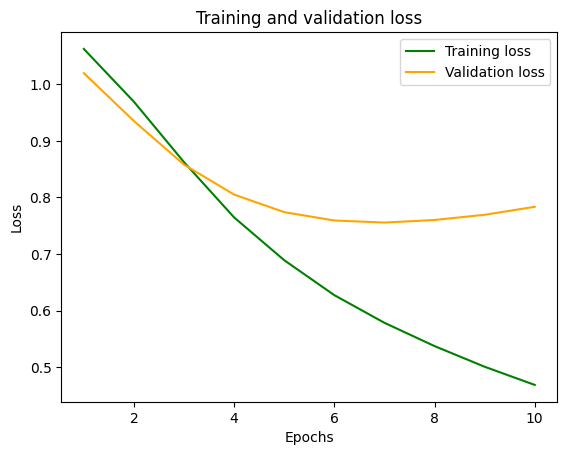

In [ ]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, color = "green", label = "Training loss")

plt.plot(epochs, val_loss, color = "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

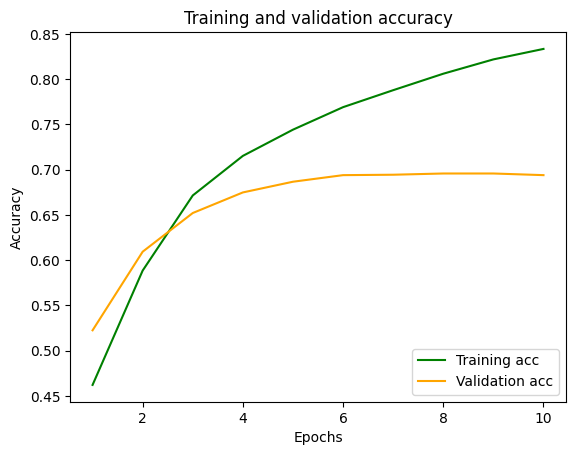

In [ ]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()

In [ ]:
export_model = Sequential([
  count_vectorizer,
  dnn_model
])

export_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = optimizers.Adam(learning_rate = 0.0001),
    metrics = ["accuracy"]
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

43/43 [==============================] - 1s 7ms/step - loss: 0.8001 - accuracy: 0.6770
0.6770378351211548


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            classification_report

predictions = export_model.predict(X_test["text"].values)

y_pred = np.argmax(predictions , axis = 1)
y_test = X_test["sentiment"]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = None)
precision = precision_score(y_test, y_pred, average = None)
recall = recall_score(y_test, y_pred, average = None)

# Get the classification report
report = classification_report(y_test,y_pred)

# Print the classification report
print(report)

172/172 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.69      0.61      0.65      1556
           1       0.63      0.71      0.67      2223
           2       0.75      0.69      0.72      1717

    accuracy                           0.68      5496
   macro avg       0.69      0.67      0.68      5496
weighted avg       0.68      0.68      0.68      5496



In [ ]:
vocab_size = 30

tfidf_vectorizer = layers.TextVectorization(
    standardize = "lower_and_strip_punctuation",
    max_tokens = vocab_size,
    output_mode = "tf-idf",
)

In [ ]:
text = ["Malcolm is an amazing painter. Malcolm also loves watching cricket",
        "Dean cooks well",
        "Malcolm is a decent footballer too",
        "Chris is a teacher, he is quite experienced in teaching"]

In [ ]:
tfidf_vectorizer.adapt(text)

In [ ]:
tfidf_vectorizer.get_vocabulary()

['[UNK]',
 'is',
 'malcolm',
 'a',
 'well',
 'watching',
 'too',
 'teaching',
 'teacher',
 'quite',
 'painter',
 'loves',
 'in',
 'he',
 'footballer',
 'experienced',
 'decent',
 'dean',
 'cricket',
 'cooks',
 'chris',
 'an',
 'amazing',
 'also']

In [ ]:
tfidf_vectorizer(text)

<tf.Tensor: shape=(4, 24), dtype=float32, numpy=
array([[0.        , 0.6931472 , 1.6945957 , 0.        , 0.        ,
        1.0986123 , 0.        , 0.        , 0.        , 0.        ,
        1.0986123 , 1.0986123 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.0986123 , 0.        ,
        0.        , 1.0986123 , 1.0986123 , 1.0986123 ],
       [0.        , 0.        , 0.        , 0.        , 1.0986123 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.0986123 , 0.        , 1.0986123 ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.6931472 , 0.84729785, 0.84729785, 0.        ,
        0.        , 1.0986123 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.0986123 ,
        0.        , 1.0986123 , 0.        , 0.        , 0.        ,
        0.        , 0

In [ ]:
vocab_size = 10000

tfidf_vectorizer = layers.TextVectorization(
    standardize = custom_standardization,
    max_tokens = vocab_size,
    output_mode = "tf-idf",
    ngrams = (1, 2)
)

tfidf_vectorizer.adapt(train_text)

In [ ]:
tfidf_vectorizer.get_vocabulary()

['[UNK]',
 'day',
 'good',
 'get',
 'like',
 'go',
 'today',
 'love',
 'going',
 'work',
 'got',
 'one',
 'time',
 'lol',
 'know',
 'happy',
 'u',
 'really',
 'back',
 'im',
 'see',
 'night',
 'new',
 'home',
 'think',
 'want',
 'well',
 'oh',
 'much',
 'still',
 'thanks',
 'miss',
 'great',
 'last',
 'need',
 'morning',
 'haha',
 'hope',
 'would',
 'feel',
 'fun',
 'tomorrow',
 'sorry',
 'twitter',
 'wish',
 'bad',
 'make',
 'tonight',
 'sad',
 'right',
 'week',
 'yeah',
 'nice',
 'way',
 'mother',
 'gonna',
 'though',
 'better',
 'sleep',
 'could',
 'weekend',
 'come',
 'next',
 'people',
 'bed',
 'getting',
 'mothers',
 'wait',
 'watching',
 'mother day',
 'hate',
 'days',
 'say',
 'awesome',
 'thing',
 'school',
 'dont',
 'even',
 'mom',
 'soon',
 'yes',
 'long',
 'little',
 'show',
 'best',
 'working',
 'sure',
 'never',
 'ok',
 'thank',
 'done',
 'mothers day',
 'tired',
 'hey',
 'cool',
 'feeling',
 'take',
 'cant',
 'happy mother',
 'everyone',
 'look',
 'first',
 'please',
 'l

In [ ]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return tfidf_vectorizer(text), label

In [ ]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
dnn_model = Sequential([
    layers.Dense(64, activation = "tanh"),
    layers.Dropout(0.1),
    layers.Dense(32, activation = "tanh"),
    layers.Dropout(0.1),
    layers.Dense(3)
])

dnn_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = optimizers.Adam(learning_rate = 0.00001),
    metrics = ["accuracy"]
)

history = dnn_model.fit(
    train_ds,
    epochs = 40,
    validation_data = val_ds
)

Epoch 1/40
155/155 [==============================] - 7s 18ms/step - loss: 1.1428 - accuracy: 0.3725 - val_loss: 1.0932 - val_accuracy: 0.4106
Epoch 2/40
155/155 [==============================] - 1s 9ms/step - loss: 1.1040 - accuracy: 0.4011 - val_loss: 1.0709 - val_accuracy: 0.4338
Epoch 3/40
155/155 [==============================] - 1s 9ms/step - loss: 1.0853 - accuracy: 0.4177 - val_loss: 1.0566 - val_accuracy: 0.4529
Epoch 4/40
155/155 [==============================] - 1s 6ms/step - loss: 1.0684 - accuracy: 0.4405 - val_loss: 1.0441 - val_accuracy: 0.4725
Epoch 5/40
155/155 [==============================] - 1s 4ms/step - loss: 1.0495 - accuracy: 0.4611 - val_loss: 1.0318 - val_accuracy: 0.4898
Epoch 6/40
155/155 [==============================] - 1s 6ms/step - loss: 1.0343 - accuracy: 0.4781 - val_loss: 1.0195 - val_accuracy: 0.5116
Epoch 7/40
155/155 [==============================] - 1s 6ms/step - loss: 1.0149 - accuracy: 0.5011 - val_loss: 1.0071 - val_accuracy: 0.5261
Epoch

In [ ]:
loss, accuracy = dnn_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 [==============================] - 0s 3ms/step - loss: 0.8057 - accuracy: 0.6596
Loss:  0.8057324886322021
Accuracy:  0.659570574760437


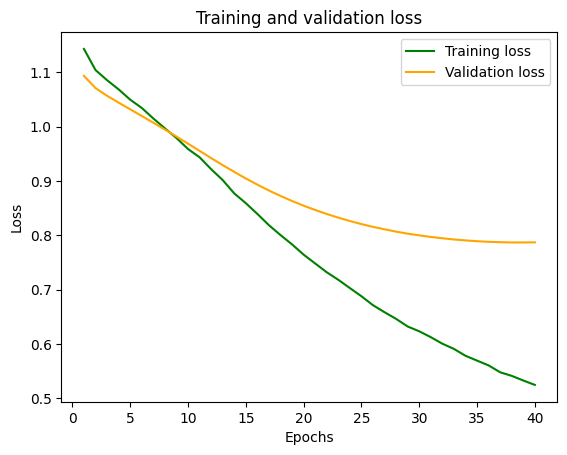

In [ ]:
history_dict = history.history
history_dict.keys()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, color = "green", label = "Training loss")

plt.plot(epochs, val_loss, color = "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

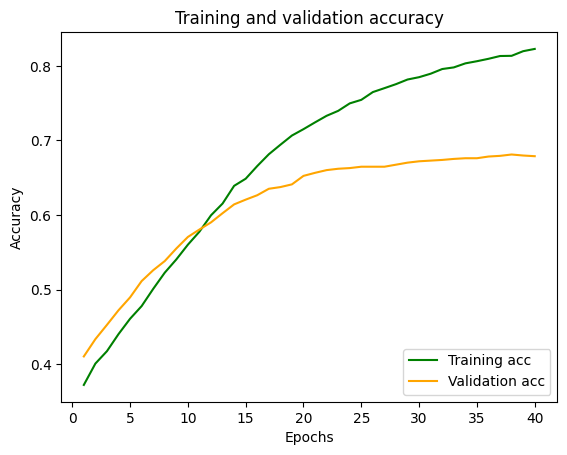

In [ ]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()

In [ ]:
export_model = Sequential([
  tfidf_vectorizer,
  dnn_model
])

export_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = optimizers.Adam(learning_rate = 0.00001),
    metrics = ["accuracy"]
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

43/43 [==============================] - 1s 9ms/step - loss: 0.8057 - accuracy: 0.6596
0.659570574760437


In [ ]:
vocab_size = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize = custom_standardization,
    max_tokens = vocab_size,
    output_mode = "int",
    output_sequence_length = sequence_length
)

In [ ]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [ ]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

In [ ]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
callback_list = [
    keras.callbacks.EarlyStopping(
        patience = 3,
        monitor = "val_accuracy"
    ),

    keras.callbacks.ReduceLROnPlateau(
        patience = 1,
        factor = 0.1,
    )
]

In [ ]:
embedding_dim = 64

model = Sequential([
  layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dense(64, activation = "tanh"),
  layers.Dropout(0.1),
  layers.Dense(32, activation = "tanh"),
  layers.Dropout(0.1),
  layers.Dense(3)]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 dropout_4 (Dropout)         (None, None, 64)          0         
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                      

In [ ]:
model.compile(optimizer = optimizers.Adam(learning_rate = 0.001),
               loss = losses.SparseCategoricalCrossentropy(from_logits = True),
               metrics = ["accuracy"])

history = model.fit(
    train_ds,
    epochs = 50,
    validation_data = val_ds,
    callbacks = callback_list
)

Epoch 1/50
155/155 [==============================] - 19s 106ms/step - loss: 1.0869 - accuracy: 0.4046 - val_loss: 1.0850 - val_accuracy: 0.4043 - lr: 0.0010
Epoch 2/50
155/155 [==============================] - 7s 45ms/step - loss: 1.0517 - accuracy: 0.4418 - val_loss: 0.9386 - val_accuracy: 0.5621 - lr: 0.0010
Epoch 3/50
155/155 [==============================] - 3s 18ms/step - loss: 0.8158 - accuracy: 0.6415 - val_loss: 0.8054 - val_accuracy: 0.6417 - lr: 0.0010
Epoch 4/50
155/155 [==============================] - 2s 14ms/step - loss: 0.7052 - accuracy: 0.7083 - val_loss: 0.7914 - val_accuracy: 0.6794 - lr: 0.0010
Epoch 5/50
155/155 [==============================] - 3s 18ms/step - loss: 0.6491 - accuracy: 0.7431 - val_loss: 0.8116 - val_accuracy: 0.6598 - lr: 0.0010
Epoch 6/50
155/155 [==============================] - 2s 13ms/step - loss: 0.5993 - accuracy: 0.7711 - val_loss: 0.7923 - val_accuracy: 0.6839 - lr: 1.0000e-04
Epoch 7/50
155/155 [==============================] - 2s 1

In [ ]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 [==============================] - 0s 7ms/step - loss: 0.7847 - accuracy: 0.6967
Loss:  0.7846724987030029
Accuracy:  0.6966884732246399


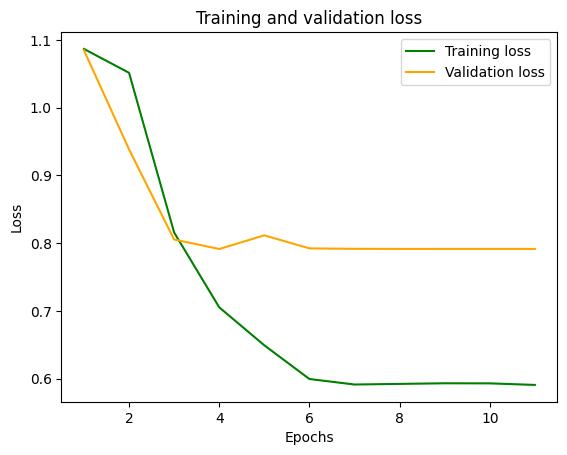

In [ ]:
history_dict = history.history
history_dict.keys()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, color = "green", label = "Training loss")

plt.plot(epochs, val_loss, color = "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

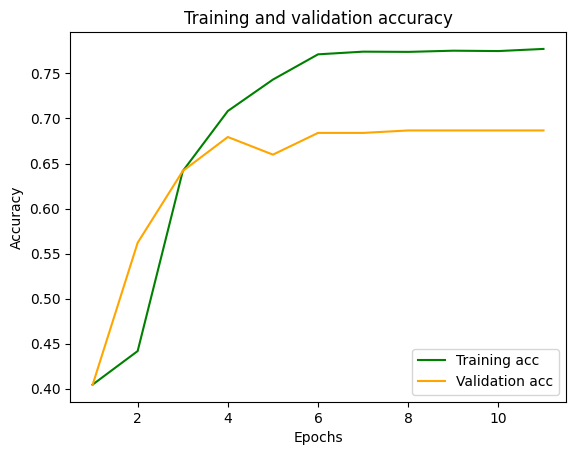

In [ ]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()

In [ ]:
embedding_dim = 128

rnn_model = Sequential()

rnn_model.add(layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim))

rnn_model.add(layers.SimpleRNN(128, return_sequences = True))

rnn_model.add(layers.GlobalMaxPool1D())

rnn_model.add(layers.Dense(3, activation = "softmax"))

rnn_model.compile(optimizer = optimizers.Adam(learning_rate = 0.001),
               loss = losses.SparseCategoricalCrossentropy(from_logits = False),
               metrics = ["accuracy"])

history = rnn_model.fit(
    train_ds,
    epochs = 20,
    validation_data = val_ds, callbacks = callback_list)

Epoch 1/20
155/155 [==============================] - 48s 301ms/step - loss: 0.8999 - accuracy: 0.5651 - val_loss: 0.7587 - val_accuracy: 0.6794 - lr: 0.0010
Epoch 2/20
155/155 [==============================] - 36s 234ms/step - loss: 0.6403 - accuracy: 0.7389 - val_loss: 0.7283 - val_accuracy: 0.6949 - lr: 0.0010
Epoch 3/20
155/155 [==============================] - 35s 226ms/step - loss: 0.4919 - accuracy: 0.8170 - val_loss: 0.7880 - val_accuracy: 0.6903 - lr: 0.0010
Epoch 4/20
155/155 [==============================] - 48s 311ms/step - loss: 0.3378 - accuracy: 0.8911 - val_loss: 0.8244 - val_accuracy: 0.6862 - lr: 1.0000e-04
Epoch 5/20
155/155 [==============================] - 35s 226ms/step - loss: 0.3098 - accuracy: 0.9009 - val_loss: 0.8185 - val_accuracy: 0.6894 - lr: 1.0000e-05


In [ ]:
loss, accuracy = rnn_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 [==============================] - 3s 65ms/step - loss: 1.0756 - accuracy: 0.4045
Loss:  1.0756059885025024
Accuracy:  0.40447598695755005


In [ ]:
embedding_dim = 128

lstm_model = Sequential()

lstm_model.add(layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim))

lstm_model.add(layers.SpatialDropout1D(0.25))

lstm_model.add(layers.LSTM(128, dropout = 0.6, return_sequences = True))

lstm_model.add(layers.GlobalMaxPooling1D())

lstm_model.add(layers.Dense(32, activation = "tanh"))
lstm_model.add(layers.Dense(3, activation = "softmax"))

lstm_model.compile(optimizer = optimizers.Adam(learning_rate = 0.001),
               loss = losses.SparseCategoricalCrossentropy(from_logits = False),
               metrics = ["accuracy"])

history = lstm_model.fit(
    train_ds,
    epochs = 20,
    validation_data = val_ds, callbacks = callback_list)

Epoch 1/20
155/155 [==============================] - 17s 84ms/step - loss: 0.9904 - accuracy: 0.5109 - val_loss: 0.7821 - val_accuracy: 0.6653 - lr: 0.0010
Epoch 2/20
155/155 [==============================] - 6s 36ms/step - loss: 0.7213 - accuracy: 0.6953 - val_loss: 0.7239 - val_accuracy: 0.6990 - lr: 0.0010
Epoch 3/20
155/155 [==============================] - 4s 29ms/step - loss: 0.6276 - accuracy: 0.7467 - val_loss: 0.7105 - val_accuracy: 0.7076 - lr: 0.0010
Epoch 4/20
155/155 [==============================] - 3s 22ms/step - loss: 0.5676 - accuracy: 0.7780 - val_loss: 0.7242 - val_accuracy: 0.7094 - lr: 0.0010
Epoch 5/20
155/155 [==============================] - 4s 24ms/step - loss: 0.4843 - accuracy: 0.8208 - val_loss: 0.7424 - val_accuracy: 0.7140 - lr: 1.0000e-04
Epoch 6/20
155/155 [==============================] - 4s 24ms/step - loss: 0.4758 - accuracy: 0.8224 - val_loss: 0.7393 - val_accuracy: 0.7149 - lr: 1.0000e-05
Epoch 7/20
155/155 [==============================] - 4

In [ ]:
loss, accuracy = lstm_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 [==============================] - 1s 13ms/step - loss: 0.7658 - accuracy: 0.6980
Loss:  0.765846312046051
Accuracy:  0.6979621648788452


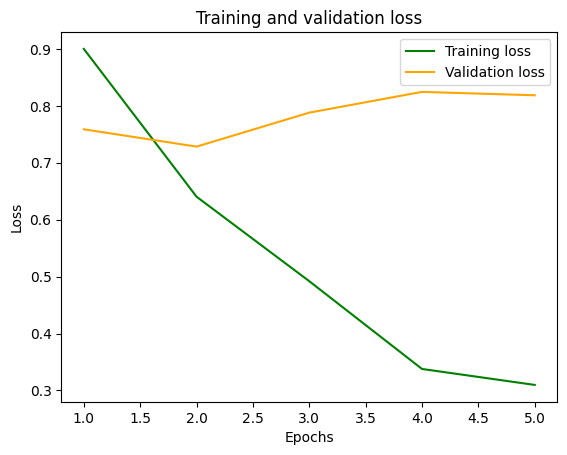

In [ ]:
history_dict = history.history
history_dict.keys()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, color = "green", label = "Training loss")

plt.plot(epochs, val_loss, color = "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

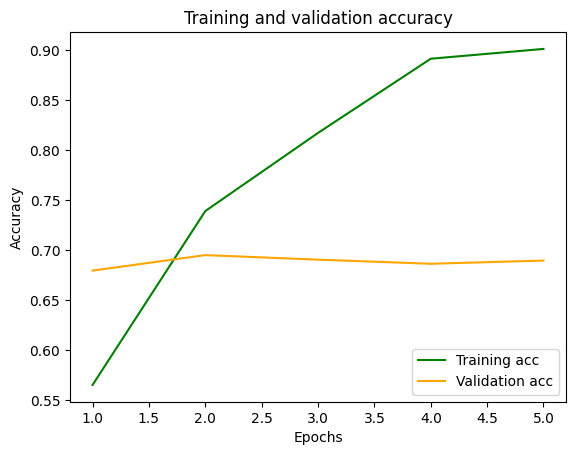

In [ ]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()

In [ ]:
export_model = Sequential([
  vectorize_layer,
  lstm_model
])

export_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = False),
    optimizer = optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

43/43 [==============================] - 2s 16ms/step - loss: 0.7658 - accuracy: 0.6980
0.6979621648788452


In [ ]:
examples = [
  "this experience has been the worst, want my money back",
  "this AI related article is very good",
  "The movie was average" ]

export_model.predict(examples)

1/1 [==============================] - 1s 790ms/step


array([[0.9720053 , 0.02427522, 0.00371946],
       [0.02576133, 0.0834888 , 0.8907498 ],
       [0.19984509, 0.7426745 , 0.05748037]], dtype=float32)

In [ ]:
np.argmax(export_model.predict(examples), axis=1)

1/1 [==============================] - 0s 55ms/step


array([0, 2, 1])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            classification_report

predictions = export_model.predict(X_test["text"].values)
y_pred = np.argmax(predictions , axis = 1)

y_test = X_test["sentiment"]
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = None)
precision = precision_score(y_test,y_pred, average = None)
recall = recall_score(y_test,y_pred, average = None)

# Get the classification report
report = classification_report(y_test,y_pred)

# Print the classification report
print(report)

172/172 [==============================] - 3s 15ms/step
              precision    recall  f1-score   support

           0       0.71      0.64      0.67      1556
           1       0.66      0.70      0.68      2223
           2       0.74      0.74      0.74      1717

    accuracy                           0.70      5496
   macro avg       0.70      0.70      0.70      5496
weighted avg       0.70      0.70      0.70      5496



In [ ]:
lstm_model.save("sentiment_predictor.keras")

In [ ]:
# Loading the saved model
loaded_model = models.load_model("sentiment_predictor.keras")
loss, accuracy = loaded_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 [==============================] - 5s 15ms/step - loss: 0.7658 - accuracy: 0.6980
Loss:  0.765846312046051
Accuracy:  0.6979621648788452
